In [29]:
import tensorflow as tf

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz',
    test_split=0.2,
    seed=42
)


In [31]:
len(X_train), len(y_train), len(X_test), len(X_test)

(404, 404, 102, 102)

In [32]:
X_train[0], y_train[0]

(array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]),
 23.6)

In [33]:
X_test[0]

array([2.1719e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
       5.8070e+00, 5.3800e+01, 3.6526e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.9094e+02, 1.6030e+01])

In [34]:
# Set seed and create model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_1')

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 2ms/step - loss: 103.4658 - mae: 103.4658
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 82.4669 - mae: 82.4669
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 73.5234 - mae: 73.5234
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 65.0759 - mae: 65.0759
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 55.9893 - mae: 55.9893
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 47.1095 - mae: 47.1095
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 38.4612 - mae: 38.4612
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 30.1609 - mae: 30.1609
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 22.4686 - mae: 22.4686
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 15.7501 - mae: 15.7501
Epoch 11/20
13/13 [============================

<Axes: >

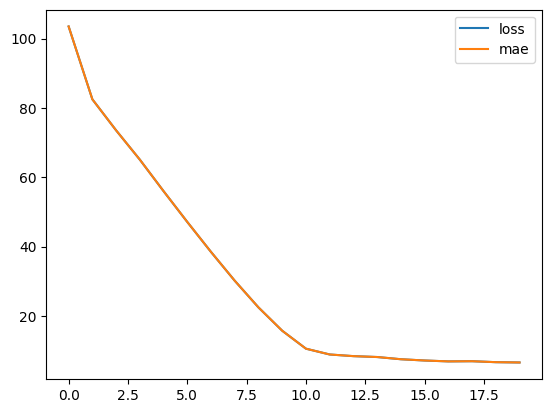

In [35]:
import pandas as pd
pd.DataFrame(model_1_history.history).plot()

In [36]:
model_1_evaluation = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.5737 - mae: 6.5737


In [37]:
# another model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_2')

# Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model
model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 2ms/step - loss: 14.9847 - mae: 14.9847
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 8.8339 - mae: 8.8339
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 7.3081 - mae: 7.3081
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 7.5521 - mae: 7.5521
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 7.1234 - mae: 7.1234
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 6.3243 - mae: 6.3243
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 6.8059 - mae: 6.8059
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 7.7800 - mae: 7.7800
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 5.8992 - mae: 5.8992
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 6.5413 - mae: 6.5413
Epoch 11/20
13/13 [==============================] - 0s 2ms/step - 

<Axes: >

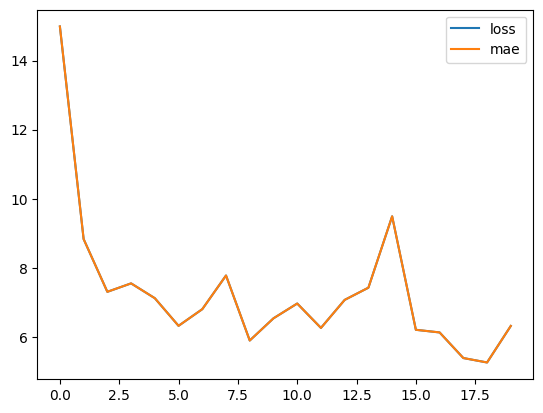

In [38]:
pd.DataFrame(model_2_history.history).plot()

In [39]:
model_2_evaluation = model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 6.4171 - mae: 6.4171


In [40]:
# set_seed and create another model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_3')

# compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# fit the model
model_3_history = model_3.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
13/13 [==============================] - 1s 1ms/step - loss: 19.4228 - mae: 19.4228 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 13.0967 - mae: 13.0967 - lr: 1.1220e-04
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 7.9360 - mae: 7.9360 - lr: 1.2589e-04
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 6.9813 - mae: 6.9813 - lr: 1.4125e-04
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 7.0194 - mae: 7.0194 - lr: 1.5849e-04
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 6.8277 - mae: 6.8277 - lr: 1.7783e-04
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 6.9696 - mae: 6.9696 - lr: 1.9953e-04
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 6.8654 - mae: 6.8654 - lr: 2.2387e-04
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 7.0954 - mae: 7.0954 - lr: 2.5119e-

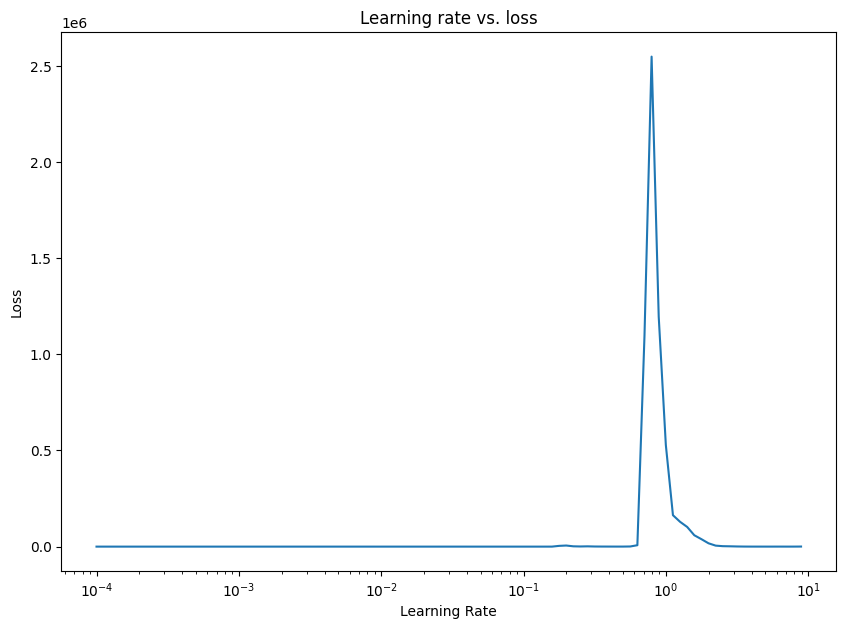

In [41]:
# Plot the learning rate versus the loss
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_3_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

No need to change learning rate


In [42]:
# set seed and create final model with more epochs

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_4')

# Compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model
model_4_history = model_4.fit(X_train,
                              y_train,
                              epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 12.5221 - mae: 12.5221
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 8.2687 - mae: 8.2687
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 6.8219 - mae: 6.8219
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 7.3246 - mae: 7.3246
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 7.5453 - mae: 7.5453
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 6.9811 - mae: 6.9811
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 6.2897 - mae: 6.2897
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 6.2433 - mae: 6.2433
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 6.1057 - mae: 6.1057
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 6.1411 - mae: 6.1411
Epoch 11/100
13/13 [==============================] - 0s 

<Axes: >

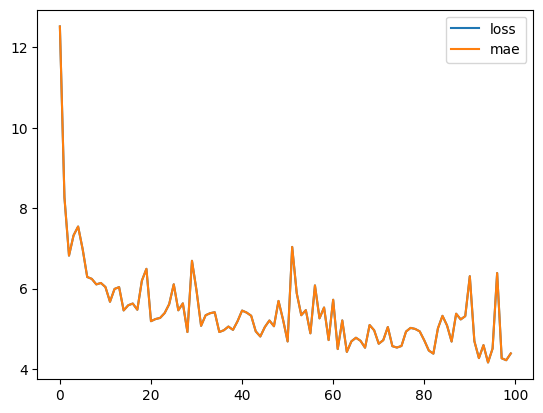

In [43]:
pd.DataFrame(model_4_history.history).plot()

In [44]:
model_4_evaluate = model_4.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.9267 - mae: 4.9267


In [45]:
X_train.shape

(404, 13)

In [46]:
norm_X_train =  tf.keras.utils.normalize(X_train)

In [47]:
norm_X_train.shape

(404, 13)

In [48]:
norm_X_train[0]

array([1.82991348e-04, 0.00000000e+00, 8.07490696e-03, 0.00000000e+00,
       1.01684014e-03, 1.27922477e-02, 1.67678932e-01, 5.27620402e-03,
       9.96902094e-03, 5.90166040e-01, 3.30971495e-02, 7.88549556e-01,
       1.80239899e-02])

In [49]:
norm_X_test = tf.keras.utils.normalize(X_test)

In [50]:
norm_X_test.shape

(102, 13)

In [56]:
model_4_norm_history = model_4.fit(norm_X_train,
                                   y_train,
                                   epochs=1000)

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8208 - mae: 4.8208
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8232 - mae: 4.8232
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8266 - mae: 4.8266
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8166 - mae: 4.8166
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.8138 - mae: 4.8138
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.8127 - mae: 4.8127
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8151 - mae: 4.8151
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.8201 - mae: 4.8201
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.8220 - mae: 4.8220
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8350 - mae: 4.8350
Epoch 11/1000
13/13 [============================

In [57]:
model_4_norm_evaluate = model_4.evaluate(norm_X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.6630 - mae: 3.6630


<Axes: >

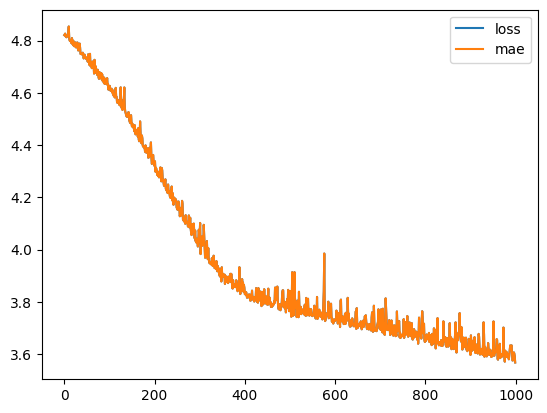

In [58]:
pd.DataFrame(model_4_norm_history.history).plot()

In [63]:
# set seed and create final model with more epochs

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
], name='model_4')

# Compile
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model
model_5_history = model_5.fit(X_train,
                              y_train,
                              epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 38.1519 - mae: 38.1519
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 13.1761 - mae: 13.1761
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 8.0234 - mae: 8.0234
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 6.1073 - mae: 6.1073
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 5.6813 - mae: 5.6813
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 5.4881 - mae: 5.4881
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 5.4114 - mae: 5.4114
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 5.3034 - mae: 5.3034
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 5.3132 - mae: 5.3132
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 5.1604 - mae: 5.1604
Epoch 11/200
13/13 [==============================] - 0

In [64]:
model_5_evaluate = model_5.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.1997 - mae: 3.1997


<Axes: >

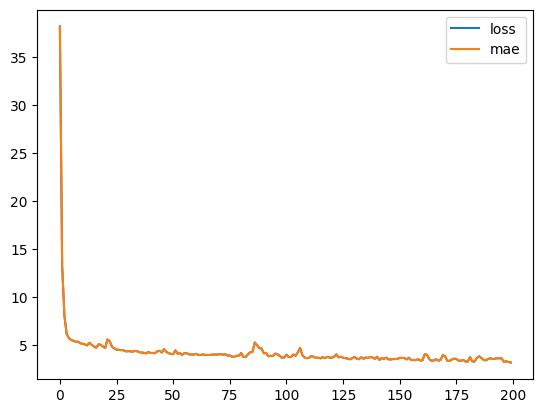

In [65]:
pd.DataFrame(model_5_history.history).plot()